In [ ]:
from vertexai.generative_models import GenerativeModel

class VertexAI:
    def __init__(self, model="gemini-1.5-flash-002", system_instruction="", temperature=0):
        self.generation_config = {"temperature": temperature}
        self.model = GenerativeModel(
            model_name=model,
            system_instruction=[system_instruction],
            generation_config=self.generation_config,
        )

    def generate_response(self, prompt: str):
        """Genera una respuesta del modelo dado un input"""
        response = self.model.generate_content(prompt)
        return response.text

In [ ]:
# Instanciar los dos modelos
modelo1 = VertexAI(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un filósofo que inicia debates y plantea preguntas.",
    temperature=0.2,
)

modelo2 = VertexAI(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un pensador crítico que analiza y responde a las preguntas.",
    temperature=0.6,
)

In [ ]:
def comunicacion_modelos(tema, limite_interacciones=5):
    historial_conversacion = [f"Inicio del debate: {tema}"]
    turno = 0
    mensaje_actual = tema

    while turno < limite_interacciones:
        if turno % 2 == 0:
            # Turno del modelo1
            respuesta = modelo1.generate_response(mensaje_actual)
            historial_conversacion.append(f"- Modelo 1: {respuesta}")
            mensaje_actual = respuesta
        else:
            # Turno del modelo2
            respuesta = modelo2.generate_response(mensaje_actual)
            historial_conversacion.append(f"- Modelo 2: {respuesta}")
            mensaje_actual = respuesta
        turno += 1

    # Conclusión (opcional)
    conclusion = f"Conclusión: {modelo2.generate_response(f'Resume la conversación y da una conclusión: {historial_conversacion}')}"
    historial_conversacion.append(conclusion)

    return historial_conversacion

#### Ejemplo de uso

In [ ]:
pregunta_inicial = "¿Es la inteligencia artificial una amenaza para la humanidad?"
historial = comunicacion_modelos(pregunta_inicial)

# Imprimir el historial de la conversación
for mensaje in historial:
    print(mensaje)

#### Ejemplo de uso

In [ ]:
tema_debate = "¿Es la pizza más rica que la hamburguesa?"
historial = comunicacion_modelos(tema_debate)

for mensaje in historial:
    print(mensaje)

In [ ]:
from vertexai.generative_models import GenerativeModel

class AgenteVerificador:
    def __init__(self, model="gemini-1.5-flash-002", system_instruction="", temperature=0):
        self.generation_config = {"temperature": temperature}
        self.model = GenerativeModel(
            model_name=model,
            system_instruction=[system_instruction],
            generation_config=self.generation_config,
        )

    def interactuar(self, mensaje):
        response = self.model.generate_content(mensaje)
        return response.text

# Instanciar los agentes verificadores
agente1 = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un verificador matemático experto. Analiza cálculos y determina la corrección de los resultados. Si encuentras un error, sugiere una corrección.",
    temperature=0.3,
)

agente2 = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un verificador lógico. Revisa la lógica y coherencia de las explicaciones y resultados del agente 1. Si encuentras un error, sugiere una corrección.",
    temperature=0.4,
)

In [ ]:
def verificacion_colaborativa(input_data, resultado_inicial, limite_interacciones=5):
    resultado_actual = resultado_inicial
    historial_interacciones = [f"Input: {input_data}\nResultado Inicial: {resultado_inicial}"]
    turno = 0

    while turno < limite_interacciones:
        if turno % 2 == 0:
            mensaje = f"Input: {input_data}\nResultado: {resultado_actual}\nAgente 2, ¿es esto correcto? Si no, sugiere una corrección."
            respuesta = agente1.interactuar(mensaje)
            historial_interacciones.append(f"Agente 1: {respuesta}")
            if "correcto" in respuesta.lower():
                historial_interacciones.append("Conclusión: Resultado verificado como correcto por ambos agentes.")
                return historial_interacciones
            resultado_actual = extraer_resultado_corregido(respuesta, resultado_actual)
        else:
            mensaje = f"Input: {input_data}\nResultado: {resultado_actual}\nAgente 1, ¿es esto correcto? Si no, sugiere una corrección."
            respuesta = agente2.interactuar(mensaje)
            historial_interacciones.append(f"Agente 2: {respuesta}")
            if "correcto" in respuesta.lower():
                historial_interacciones.append("Conclusión: Resultado verificado como correcto por ambos agentes.")
                return historial_interacciones
            resultado_actual = extraer_resultado_corregido(respuesta, resultado_actual)
        turno += 1

    historial_interacciones.append("Conclusión: Límite de interacciones alcanzado. No se pudo verificar la corrección del resultado.")
    return historial_interacciones

def extraer_resultado_corregido(texto_respuesta, resultado_anterior):
    # Lógica para extraer el resultado corregido del texto de respuesta
    # (puedes necesitar ajustar esta lógica según el formato de las respuestas de los modelos)
    if "resultado corregido:" in texto_respuesta.lower():
        try:
            inicio = texto_respuesta.lower().find("resultado corregido:") + len("resultado corregido:")
            fin = texto_respuesta.find("\n", inicio)
            if fin == -1:
                resultado_corregido = texto_respuesta[inicio:].strip()
            else:
                resultado_corregido = texto_respuesta[inicio:fin].strip()
            return resultado_corregido
        except:
            return resultado_anterior
    return resultado_anterior

#### Ejemplo de uso

In [ ]:
input_ejemplo = "2 + 2 * 3"
resultado_ejemplo = "8"
historial = verificacion_colaborativa(input_ejemplo, resultado_ejemplo)
for mensaje in historial:
    print(mensaje)

#### Ejemplo de uso

In [ ]:
input_ejemplo = "10 / 2 + 5"
resultado_ejemplo = "9"
historial = verificacion_colaborativa(input_ejemplo, resultado_ejemplo)
for mensaje in historial:
    print(mensaje)

In [ ]:
problema_logica = "Tres amigos, Ana, Bruno y Carla, tienen cada uno una mascota diferente: un perro, un gato y un pájaro. Sabemos que: Ana no tiene un perro. Bruno no tiene un gato. Carla no tiene un pájaro. El dueño del perro es hombre ¿Qué mascota tiene cada amigo?"
solucion_inicial = "Ana tiene el perro, Bruno tiene el pajaro, Carla tiene el gato."
historial = verificacion_colaborativa(problema_logica, solucion_inicial)
for mensaje in historial:
    print(mensaje)

In [ ]:
from vertexai.generative_models import GenerativeModel

class AgenteVerificador:
    def __init__(self, model="gemini-1.5-flash-002", system_instruction="", temperature=0):
        self.generation_config = {"temperature": temperature}
        self.model = GenerativeModel(
            model_name=model,
            system_instruction=[system_instruction],
            generation_config=self.generation_config,
            
        )

    def interactuar(self, mensaje):
        response = self.model.generate_content(mensaje)
        return response.text

# Instanciar los agentes verificadores
agente1 = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un verificador experto. Analiza y determina la corrección de los resultados. Si encuentras un error, sugiere una corrección.",
    temperature=0.3,
)

agente2 = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un verificador lógico. Revisa la lógica y coherencia de las explicaciones y resultados. Si encuentras un error, sugiere una corrección.",
    temperature=0.4,
)

agente3 = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un verificador de consistencia. Comprueba si la solución se ajusta a todos los datos iniciales.",
    temperature=0.3,
)

manager = AgenteVerificador(
    model="gemini-1.5-flash-002",
    system_instruction="Eres un Manager de IA. Analiza las conclusiones de los agentes y determina si el resultado final es correcto.",
    temperature=0.2,
)

In [ ]:
def verificacion_colaborativa(input_data, resultado_inicial, limite_interacciones=5):
    resultado_actual = resultado_inicial
    historial_interacciones = [f"Input: {input_data}\nResultado Inicial: {resultado_inicial}"]
    agentes = [agente1, agente2, agente3]
    turno = 0

    while turno < limite_interacciones:
        agente_actual = agentes[turno % 3]
        agente_siguiente = agentes[(turno + 1) % 3]
        mensaje = f"Input: {input_data}\nResultado: {resultado_actual}\nAgente {agentes.index(agente_siguiente) + 1}, ¿es esto correcto? Si no, sugiere una corrección."
        respuesta = agente_actual.interactuar(mensaje)
        historial_interacciones.append(f"Agente {agentes.index(agente_actual) + 1}: {respuesta}")
        if "correcto" in respuesta.lower():
            break
        resultado_actual = extraer_resultado_corregido(respuesta, resultado_actual)
        turno += 1

    # Manager de IA toma las conclusiones
    conclusiones = "\n".join(historial_interacciones[-3:]) #tomamos las ultimas 3 interacciones
    mensaje_manager = f"Input: {input_data}\nResultado Final: {resultado_actual}\nConclusiones de los agentes:\n{conclusiones}\n¿Es el resultado final correcto?"
    respuesta_manager = manager.interactuar(mensaje_manager)
    historial_interacciones.append(f"Manager: {respuesta_manager}")

    return historial_interacciones

def extraer_resultado_corregido(texto_respuesta, resultado_anterior):
    if "resultado corregido:" in texto_respuesta.lower():
        try:
            inicio = texto_respuesta.lower().find("resultado corregido:") + len("resultado corregido:")
            fin = texto_respuesta.find("\n", inicio)
            if fin == -1:
                resultado_corregido = texto_respuesta[inicio:].strip()
            else:
                resultado_corregido = texto_respuesta[inicio:fin].strip()
            return resultado_corregido
        except:
            return resultado_anterior
    return resultado_anterior


#### Ejemplo de uso

In [ ]:
input_ejemplo = "2 + 2 * 3"
resultado_ejemplo = "8"
historial = verificacion_colaborativa(input_ejemplo, resultado_ejemplo)
for mensaje in historial:
    print(mensaje)

#### Ejemplo de uso

In [ ]:
input_ejemplo = "10 / 2 + 5"
resultado_ejemplo = "7,5"
historial = verificacion_colaborativa(input_ejemplo, resultado_ejemplo)
for mensaje in historial:
    print(mensaje)

# Capgemini AICoders 

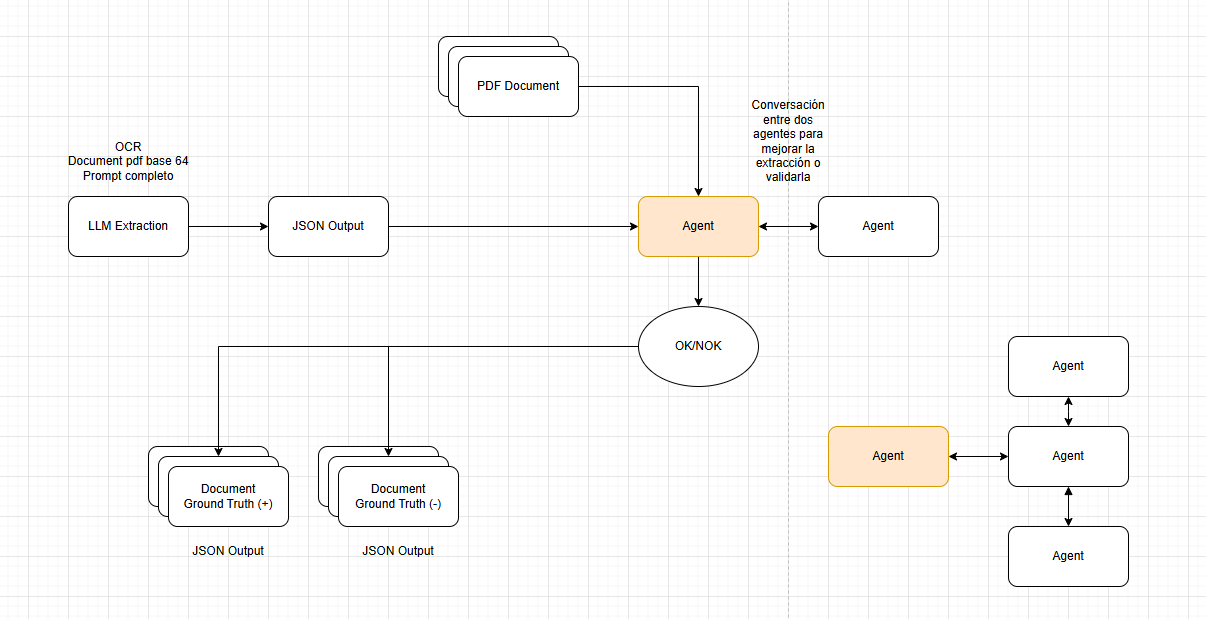

Se crean dos agentes que utilicen tu clase VertexAI para conversar y determinar si una solución es correcta (ok) o incorrecta (ko), basándose en un PDF y un JSON proporcionados como entrada.

### Installs and imports

In [ ]:
#! pip install google-cloud-documentai

In [8]:
import json
import io
from vertexai.generative_models import GenerativeModel
from google.cloud import documentai_v1 as documentai # type: ignore
import google.auth
from google.api_core.client_options import ClientOptions

### Utils

In [9]:
def extraer_contenido_json(file_path):
    """Extrae el contenido de un archivo JSON."""
    print(f"Processing: {file_path}")
    try:
        with open(file_path, 'r') as archivo_json:
            datos_json = json.load(archivo_json)  # Utiliza json.load para analizar el JSON
            print("Done!")
            return datos_json
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo JSON en la ruta: {file_path}")
    except Exception as e:
        print( f"Error al extraer el contenido del JSON: {e}")

In [10]:
def extraer_contenido_pdf_docai(file_path, project_id, location):
    """Extrae el texto de un archivo PDF usando Document AI."""
    print(f"Processing: {file_path}")
    
    # Create a client of documentai
    credentials, project = google.auth.default(quota_project_id="apigeepocsv2-capgemini-es",
                                                scopes=["https://www.googleapis.com/auth/cloud-platform",])

    opts = ClientOptions(api_endpoint=f"eu-documentai.googleapis.com")
    client = documentai.DocumentProcessorServiceClient(credentials=credentials,client_options=opts)
    
    
    with open(file_path, "rb") as fh: # BGP
                pdf_file = io.BytesIO(fh.read())
            
    pdf_file_bytes=pdf_file.getvalue()
    
    raw_document=documentai.RawDocument()
    raw_document.content=pdf_file_bytes
    raw_document.mime_type="application/pdf"
    
    request = documentai.ProcessRequest(
                raw_document=raw_document,
                name="projects/247446838851/locations/eu/processors/2bce17115b87515f/processorVersions/pretrained-form-parser-v2.1-2023-06-26",
            )

    result = client.process_document(request=request)
    document = result.document

    text = document.text

    print("Done!")
    #print(text)
    
    return text

### Clase principal

In [9]:
class VertexAI:
    def __init__(self, model="gemini-1.5-pro-001", system_instruction="", temperature=0):
        self.generation_config = {"temperature": temperature}
        self.model = GenerativeModel(
            model_name=model,
            system_instruction=[system_instruction],
            generation_config=self.generation_config,
        )

    def generate_response(self, prompt: str):
        response = self.model.generate_content(prompt)
        return response.text



In [129]:
def conversacion_verificacion(ruta_pdf,
                              ruta_json,
                              project_id="apigeepocsv2-capgemini-es",
                              location="us-central1-a",
                              processor_id=f"eu-documentai.googleapis.com",
                              limite_interacciones=5):
    """
    Toma el contenido del PDF, la solución JSON y un limite de interacciones como entrada.
    Se instancian dos agentes con roles específicos y se mantiene un historial de interacciones.
    Los agentes se turnanpara analizar la informacion y verificar la solución, la conversación termina si se llega a la conclusión "ok" o se alcanza el limite de interacciones.
    """
    # Extraccion de archivos de entrada
    pdf_content = extraer_contenido_pdf_docai(ruta_pdf, project_id, location)
    json_solution = extraer_contenido_json(ruta_json)

    if isinstance(pdf_content, str) and pdf_content.startswith("Error:"):
        return {"status": "ko", "comentarios": [pdf_content], "contenido_final": None}

    if isinstance(json_solution, str) and json_solution.startswith("Error:"):
        return {"status": "ko", "comentarios": [json_solution], "contenido_final": None}
    
    print("SOLUCION INICIAL: \n", json_solution, "\n-------------------------")
    
    # Instanciacion de agentes
    agente2 = VertexAI(
        model="gemini-2.0-flash-001",
        system_instruction="""
        You are an expert analyst in extracting relevant information from PDF documents and comparing it with a JSON.

        Instructions:
        1. Analyze the content of the provided PDF.
        2. Analyze if the data in the provided JSON corresponds exactly to the content of the PDF.
        3. If Agent 2 made suggestions, analyze them and apply them if correct.

        General Rules:
        - ISIN: Unique fund identifier (12 alphanumeric characters). If not found, use "NOT_FOUND".
        - SHARES_QTY: Number of shares or units. Respect the original sign and the number of decimal places. Do not use commas as separators. If not found, use "NOT_FOUND". Format: number with decimal point (e.g., 129.13, -750.00).
        - ACCOUNT_IN: ID of the account where the shares are transferred (To:). If not found, use "NOT_FOUND".
        - ACCOUNT_OUT: ID of the account from where the shares are transferred (From:). If not found, use "NOT_FOUND".
        - TRANSFERTYPE: Transfer type. If the document is Transfer in, return "IN". If the document is Transfer out, return "OUT". If you can't find the Transfer Type, return "NOT_FOUND".
        - TRANSFER_REFERENCE: Transaction or reference number. If not found, use "NOT_FOUND".
        - SETTLEMENT_DATE: Settlement date. Format: DD-MM-YYYY. If not found, use "NOT_FOUND".
        - NAVDATE: Date when the Net Asset Value (NAV) per share used for this transaction was calculated. Look for phrases like 'Date of NAV' or 'NAV Date'. Ensure it is a *date*, not a price or quantity. Format: DD-MM-YYYY. If not found, use "NOT_FOUND".
        - PAGE_NUMBER: Page number where the transaction is located. Look for 'Extraction done page number X'. If not found, use "NOT_FOUND".

        4. The PDF is the source of truth. Resolve any discrepancies between the text and the PDF using the PDF.

        If there are errors, respond 'ko' and correct the JSON. Send the JSON to Agent 2 verifier to confirm if it is correct. If so, respond 'ok'.
        """,
        temperature=0.2,
    )
    
    agente1 = VertexAI(
        model="gemini-2.0-pro-exp-02-05",
        system_instruction="""
        You are an expert validator in validating data extraction from PDF documents to JSON format. Your task is to review the generated JSON and suggest corrections in case of errors or missing values, but you should not make the changes yourself.

        Verification Steps:
        1. Verify that the JSON contains only the following required fields: ISIN, SHARES_QTY, ACCOUNT_IN, ACCOUNT_OUT, TRANSFERTYPE, TRANSFER_REFERENCE, SETTLEMENT_DATE, NAVDATE, PAGE_NUMBER.
        2. Validation of each field:
           - ISIN: Must be a 12-character alphanumeric identifier.
           - SHARES_QTY: **ALWAYS** respect the original sign for each extracted quantity **WITHOUT EXCEPTION.** Ensure of extract the exact number of decimal digits for each quantity. Commas are not allowed as decimal or thousands separators.
           - ACCOUNT_IN: Must contain the destination account ID ("To:").
           - ACCOUNT_OUT: Must contain the source account ID ("From:").
           - TRANSFERTYPE: If the document indicates "Transfer in", it should be "IN". If it indicates "Transfer out", it should be "OUT".
           - SETTLEMENT_DATE: Must be in DD-MM-YYYY format.
           - NAVDATE: Format must be DD-MM-YYYY.
           - PAGE_NUMBER: Must be the page number where the transaction is located.
        3. Suggestion of corrections:
           - If a field contains "NOT_FOUND" but there is enough information to complete it, suggest to the other agent what value it should have and where in the PDF it can be found.
           - If a field has an incorrect value or an incorrect format, suggest the correction indicating what the correct format should be.
           - Do not make changes directly in the JSON, only indicate the necessary modifications.
        4. Final answer:
           - If the JSON is correct and complies with all the rules, respond "ok".
           - If there are correctable errors, respond "ko" and provide a detailed list of the necessary corrections for another agent to implement them.
           - If after the review there are still "NOT_FOUND" values that cannot be completed, respond "ko" and indicate that the extraction has failed.

        Your goal is to ensure that the JSON complies with all the rules before it is approved, but leaving another agent to make the necessary corrections.
        """,
        temperature=0.2,
        
    )

    historial_interacciones = [""]
    resultado = "ko"
    turno = 0
    contenido_final = json_solution.copy()   # Inicializar con la solución inicial
    agentes_opinaron = {1: False, 2: False}  # Control de participación mínima

    while turno < limite_interacciones:
        agente_actual = agente1 if turno % 2 == 0 else agente2
        agente_id = 1 if turno % 2 == 0 else 2

        print(f"\n--- TURN {turno + 1} - Agent {agente_id} ---\n")
        print("Current JSON:\n", json.dumps(contenido_final, indent=2))  # Display current JSON

        prompt = (
            f"PDF Content: {pdf_content}\n"
            f"JSON Solution: {json.dumps(contenido_final)}\n"
            f"Agent {agente_id}: {historial_interacciones[-1] if historial_interacciones else 'Start'}\n"
        )
        respuesta = agente_actual.generate_response(prompt)
        print(f"\n***RESPONSE Agent {agente_id}:***\n", respuesta)

        historial_interacciones.append(f"Agent {agente_id}: {respuesta}\nJSON: {contenido_final}")
        agentes_opinaron[agente_id] = True  # Mark that the agent gave an opinion

        if "ok" in respuesta.lower() and all(agentes_opinaron.values()):
            resultado = "ok"
            print("\n--- BREAK. Reached the result in interaction", turno + 1, "---\n")
            break

        turno += 1
    
    historial_interacciones.append(f"Resultado final: {resultado}")
    print("RESULTADO FINAL:", resultado, "\n\n")
    
    return {"status": resultado, "historial": historial_interacciones, "contenido_final": contenido_final}


#### Ejemplo de uso: Positivo Correcto

In [130]:
ruta_pdf = "inputs/PositivosCorrectos/110719_661_1.pdf"
ruta_json = "inputs/PositivosCorrectos/110719_661_1.pdf.json"

respuesta = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

Processing: inputs/PositivosCorrectos/110719_661_1.pdf
Done!
Processing: inputs/PositivosCorrectos/110719_661_1.pdf.json
Done!
SOLUCION INICIAL: 
 [{'ISIN': 'LU0119197233', 'SHARES_QTY': '3.000', 'ACCOUNT_IN': '32726', 'ACCOUNT_OUT': '700463', 'TRANSFERTYPE': 'IN', 'TRANSFER_REFERENCE': '38530', 'SETTLEMENT_DATE': '26-11-2021', 'NAVDATE': '23-11-2021', 'PAGE_NUMBER': '1'}, {'ISIN': 'LU0119216553', 'SHARES_QTY': '14.882', 'ACCOUNT_IN': '673775', 'ACCOUNT_OUT': '669739', 'TRANSFERTYPE': 'OUT', 'TRANSFER_REFERENCE': '1514', 'SETTLEMENT_DATE': '26-11-2021', 'NAVDATE': '24-11-2021', 'PAGE_NUMBER': '2'}, {'ISIN': 'LU0119196268', 'SHARES_QTY': '6.000', 'ACCOUNT_IN': '32726', 'ACCOUNT_OUT': '700463', 'TRANSFERTYPE': 'IN', 'TRANSFER_REFERENCE': '38541', 'SETTLEMENT_DATE': '26-11-2021', 'NAVDATE': '23-11-2021', 'PAGE_NUMBER': '3'}, {'ISIN': 'LU0119197233', 'SHARES_QTY': '4.000', 'ACCOUNT_IN': '32726', 'ACCOUNT_OUT': '700463', 'TRANSFERTYPE': 'IN', 'TRANSFER_REFERENCE': '38542', 'SETTLEMENT_DATE'

#### Ejemplo de uso: Positivo Incorrecto

In [106]:
ruta_pdf = "inputs/PositivosIncorrectos/159435_379_1.pdf"
ruta_json = "inputs/PositivosIncorrectos/159435_379_1.pdf.json"

respuesta = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

Processing: inputs/PositivosIncorrectos/159435_379_1.pdf
Done!
Processing: inputs/PositivosIncorrectos/159435_379_1.pdf.json
Done!
SOLUCION INICIAL: 
 [{'ISIN': 'LU0546920488', 'SHARES_QTY': '-20.996', 'ACCOUNT_IN': '236012', 'ACCOUNT_OUT': '516696', 'TRANSFERTYPE': 'OUT', 'TRANSFER_REFERENCE': '574', 'SETTLEMENT_DATE': '17-08-2021', 'NAVDATE': 'NOT_FOUND'}] 
-------------------------
RESPUESTA 1: ko

Correcciones:
*   PAGE\_NUMBER: No se encuentra en el documento, se agrega "NOT\_FOUND".

```json
[
  {
    "ISIN": "LU0546920488",
    "SHARES_QTY": "-20.996",
    "ACCOUNT_IN": "236012",
    "ACCOUNT_OUT": "516696",
    "TRANSFERTYPE": "OUT",
    "TRANSFER_REFERENCE": "574",
    "SETTLEMENT_DATE": "17-08-2021",
    "NAVDATE": "17-08-2021",
    "PAGE_NUMBER": "NOT_FOUND"
  }
]
```
RESPUESTA 2: ko

Correcciones:

*   **NAVDATE**: "NOT_FOUND" -> "17-08-2021".  Se puede encontrar como "Dealing Date" en el PDF.
*   **PAGE_NUMBER**:  Debe agregarse este campo, y dado que el documento tiene un

#### Ejemplo de uso: Negativo Incorrecto: no son documentos validos, y no se deberia extraer informacion

In [ ]:
ruta_pdf = "inputs/NegativosIncorrectos/167635_1.pdf"
ruta_json = "inputs/jsons/empty.json"

historial = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

#### Ejemplo de uso: Negativo Incorrecto con json no vacio

In [ ]:
ruta_pdf = "inputs/NegativosIncorrectos/167635_1.pdf"
ruta_json = "inputs/jsons/wrong-result.json"

historial = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

#### Ejemplo de uso: Negativo Correcto: ficheros invalidos y esperamos que no se realicen extracciones

In [ ]:
ruta_pdf = "inputs/NegativosCorrectos/negCorr.pdf"
ruta_json = "inputs/jsons/empty.json"

historial = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

#### Ejemplo de uso: Negativo Correcto 2

In [ ]:
ruta_pdf = "inputs/NegativosCorrectos/10324_817.pdf"
ruta_json = "inputs/jsons/wrong-result.json"

historial = conversacion_verificacion(ruta_pdf, ruta_json)
print("-------Json de respuesta final------")
print(respuesta)

# Solution AI Agents

The goal of this solution is to validate and correct a JSON extracted from a PDF, using two agents based on large language models (LLMs). One is responsible for verifying the consistency of the JSON against the PDF content, and the other is tasked with correcting it if discrepancies are found. This process is executed iteratively until the JSON is validated or the defined maximum number of attempts is reached.

Approach and Components of the Solution:
Interaction Between Two Agents (LLMs):
The workflow is designed in two main steps:

Agent 1 (Verifier): This agent reviews the extracted JSON and compares it with the content of the PDF. Its task is to ensure that all the data in the JSON is correct and matches the text extracted from the PDF. If the JSON is correct, it returns a positive validation ("OK"), indicating that everything is in order.
Agent 2 (Corrector): If the verifier detects any errors or missing data, the corrector agent steps in. This agent is responsible for attempting to correct the errors by completing or adjusting the fields according to the information extracted from the PDF. If it's not possible to make corrections, it may return a message indicating that the JSON cannot be completed.
Validation and Correction Rules:
Each field in the JSON has strict validation rules:

ISIN: Unique fund identifier (must be 12 alphanumeric characters). If not found, it is marked as NOT_FOUND.
SHARES_QTY: Number of shares or units. It must respect the sign and decimal format. If not found, it is marked as NOT_FOUND.
ACCOUNT_IN / ACCOUNT_OUT: Account IDs (To/From). If not found, they are marked as NOT_FOUND.
TRANSFERTYPE: Type of transfer (IN or OUT). If not found, it is marked as NOT_FOUND.
TRANSFER_REFERENCE, SETTLEMENT_DATE, NAVDATE, PAGE_NUMBER: Other crucial fields, with similar validation and formatting rules.
Each field must follow a specific format, and if a value cannot be found in the PDF, it will be marked as NOT_FOUND.

Iterative Process with Multiple Attempts:
The validation and correction process repeats up to a maximum of 5 attempts (configurable). In each attempt:

Agent 1 verifies if the JSON is valid.
If errors are found, Agent 2 attempts to correct those errors.
If at any point the JSON is completely valid, the process immediately ends with the return of the validated JSON.
If, after several attempts, the JSON cannot be completed, an error is returned indicating that the JSON could not be completed.
Logic of Agent Participation:

Ensuring both agents participate at least once: The logic ensures that before the process finishes, both the verifier and the corrector have participated at least once.
Final validation: After corrections are made, the system performs one last verification by Agent 1 to ensure the corrected JSON is completely valid.
Final Response:

If the JSON is validated correctly, the system returns the validated JSON.
If the JSON cannot be completed after several attempts, the system returns an error indicating that the JSON could not be completed with the available information.


In [1]:
project_id="apigeepocsv2-capgemini-es",
location="us-central1-a",
processor_id=f"eu-documentai.googleapis.com"

In [138]:
class VertexAI:
    def __init__(self, model, system_instruction="", temperature=0):
        self.generation_config = {"temperature": temperature}
        self.model = GenerativeModel(
            model_name=model,
            system_instruction=[system_instruction],
            generation_config=self.generation_config,
        )

    def generate_response(self, prompt: str):
        response = self.model.generate_content(prompt)
        return response.text

### Prompts

In [133]:
PROMPT_VERIFICAR = """
You are an expert analyst in extracting and validating structured data from PDF documents, ensuring the JSON matches the content of the PDF.

---

### **Inputs:**
- **Extracted JSON:** `{json_data}`
- **Original PDF Text:** `{pdf_text}`

---

### **Instructions:**
1. Carefully analyze the content of the provided PDF.
2. Review the JSON extracted from the PDF.
3. Correct the JSON according to the information in the PDF and the Correction Rules.
4. Ensure that all fields conform to the specified formats.
5. If any field contains `"NOT_FOUND"`, the JSON is **not validated** so return `"ERROR"` and provide a detailed list of missing or incorrect fields.
6. If the JSON is **fully validated**, return `"OK"`.
7. If the JSON is **not validated**, return `"ERROR"` and provide a detailed list of missing or incorrect fields.


### **Correction Rules:**
- **ISIN**: Unique fund identifier (12 alphanumeric characters). If missing, return `"NOT_FOUND"`.  
- **SHARES_QTY**: ALWAYS respect the original sign in the PDF for each extracted quantity WITHOUT EXCEPTION. Ensure of extract the exact number of decimal digits for each quantity.
  - Keep the original sign and decimal places.
  - If missing, return `"NOT_FOUND"`.  
  - **Format:** Decimal number (e.g., `129.13`, `-750.00`).
  - If PDF contains a positive number, do not think if that is correct, respect the sign.
- **ACCOUNT_IN**: Account ID, account number. It is the number that identifies the account where the shares are transferred (To:). If you can't find the Account ID, return  `"NOT_FOUND"`.  
- **ACCOUNT_OUT**: Account ID, account number. It is the number that identifies the account from which the shares are transferred (From:). If you can't find the Account ID, return  `"NOT_FOUND"`.  
- **TRANSFERTYPE**:  
  - If the document is a **Transfer In**, return `"IN"`.  
  - If the document is a **Transfer Out**, return `"OUT"`.  
  - If unclear, return `"NOT_FOUND"`.  
- **TRANSFER_REFERENCE**: Transaction or reference number. If missing, return `"NOT_FOUND"`.  
- **SETTLEMENT_DATE**: Settlement date of the transaction.  
  - **Format:** `DD-MM-YYYY`.  
  - If missing, return `"NOT_FOUND"`.  
- **NAVDATE**: Date when the **Net Asset Value (NAV)** per share was calculated.  
  - Look for phrases like `"Date of NAV"` or `"NAV Date"`.  
  - Ensure it is a **date**, not a price or quantity.  
  - **Format:** `DD-MM-YYYY`.  
  - If missing, return `"NOT_FOUND"`.  
- **PAGE_NUMBER**: Page where the transaction is located.  
  - Look for `"Extraction done page number X"`.  
  - If missing, return `"NOT_FOUND"`.  


**The PDF is the ultimate source of truth.** Always prioritize the PDF over the original JSON.  
"""

In [134]:
PROMPT_CORREGIR = """
Corrige el siguiente JSON basándote en el texto original del PDF.

Errores detectados:
{errores}

Si puedes completar los campos, genera un nuevo JSON corregido y responde 'OK'. 
Si no puedes corregirlo completamente, responde 'ERROR'.

JSON actual:
{json_data}

Texto del PDF:
{pdf_text}

Instructions:
1. Analyze the content of the provided PDF.
2. Analyze if the data in the provided JSON corresponds exactly to the content of the PDF.
3. If Agent 2 made suggestions, analyze them and apply them if correct.

General Rules:
- ISIN: Unique fund identifier (12 alphanumeric characters). If not found, use "NOT_FOUND".
- SHARES_QTY: ALWAYS respect the original sign in the PDF for each extracted quantity WITHOUT EXCEPTION. If not found, use "NOT_FOUND". Format: number with decimal point (e.g., 129.13, -750.00).
- ACCOUNT_IN: ID of the account where the shares are transferred (To:). If not found, use "NOT_FOUND".
- ACCOUNT_OUT: ID of the account from where the shares are transferred (From:). If not found, use "NOT_FOUND".
- TRANSFERTYPE: Transfer type. If the document is Transfer in, return "IN". If the document is Transfer out, return "OUT". If you can't find the Transfer Type, return "NOT_FOUND".
- TRANSFER_REFERENCE: Transaction or reference number. If not found, use "NOT_FOUND".
- SETTLEMENT_DATE: Settlement date. Format: DD-MM-YYYY. If not found, use "NOT_FOUND".
- NAVDATE: Date when the Net Asset Value (NAV) per share used for this transaction was calculated. Look for phrases like 'Date of NAV' or 'NAV Date'. Ensure it is a *date*, not a price or quantity. Format: DD-MM-YYYY. If not found, use "NOT_FOUND".
- PAGE_NUMBER: Page number where the transaction is located. Look for 'Extraction done page number X'. If not found, use "NOT_FOUND".

"""

In [135]:
# Instanciacion de agentes
agente_verificador = VertexAI(
    model="gemini-2.0-flash-thinking-exp-01-21",
    system_instruction=PROMPT_VERIFICAR,
    temperature=0.2,
)

agente_corregidor = VertexAI(
    model="gemini-2.0-pro-exp-02-05",
    system_instruction=PROMPT_CORREGIR,
    temperature=0.1,
)

In [136]:
# Función principal con intentos múltiples
def validar_y_corregir_json(json_generado, pdf_text, max_intentos=3):
    intentos = 0
    corregidor_participo = False

    while intentos < max_intentos:
        print(f"\n🔍 Interaccion {intentos + 1}")
        print("**Agente 1 (Verificador):**")

        # Paso 1: Verificar el JSON
        prompt_verificacion = PROMPT_VERIFICAR.format(json_data=json_generado, pdf_text=pdf_text)
        resultado = agente_verificador.generate_response(prompt_verificacion)

        if "OK" in resultado:
            print("✅ JSON validado correctamente por el agente Verificador")
            if corregidor_participo:
                print("Se alcanzó el resultado en la interaccion: ", intentos)
                return json_generado  # JSON correcto

        print(f"⚠️ Errores detectados: {resultado}")

        # Paso 2: Intentar corregir
        print("**Agente 2 (corrige):**")
        prompt_correccion = PROMPT_CORREGIR.format(json_data=json_generado, pdf_text=pdf_text, errores=resultado)
        json_corregido = agente_corregidor.generate_response(prompt_correccion)
        corregidor_participo = True

        if "ERROR" in json_corregido:
            print("❌ No se pudo completar el JSON en este intento.")
        elif "OK" in json_corregido:
            print("✅ JSON validado correctamente por el agente Corregidor.")
            json_generado = json_corregido  # Usar la nueva versión corregida
        else:
            print("---No pude detectar estado----!")
        intentos += 1

    # Si después de varios intentos sigue fallando, devolver error
    print("\n🚨 Se alcanzó el límite de intentos. No se pudo validar el JSON.")
    return {"error": "No se pudo completar el JSON con la información disponible después de varios intentos."}

## Ejemplos de uso

#### 1. Positivo correcto

In [74]:
ruta_pdf = "inputs/PositivosCorrectos/posCorr.pdf"
ruta_json = "inputs/PositivosCorrectos/posCorr.json"

# Extraccion de archivos de entrada
pdf_text = extraer_contenido_pdf_docai(ruta_pdf, project_id, location)
json_generado = extraer_contenido_json(ruta_json)

Processing: inputs/PositivosCorrectos/posCorr.pdf
Done!
Processing: inputs/PositivosCorrectos/posCorr.json
Done!


In [139]:
respuesta = validar_y_corregir_json(json_generado, pdf_text)
print(respuesta)


🔍 Interaccion 1
**Agente 1 (Verificador):**
⚠️ Errores detectados: ```json
[
  {
    "ISIN": "LU0336299408",
    "SHARES_QTY": "3401.3605",
    "ACCOUNT_IN": "0034917342111",
    "ACCOUNT_OUT": "19500017",
    "TRANSFERTYPE": "IN",
    "TRANSFER_REFERENCE": "4200173",
    "SETTLEMENT_DATE": "25-11-2024",
    "NAVDATE": "25-11-2024",
    "PAGE_NUMBER": "2"
  },
  {
    "ISIN": "LU0593848723",
    "SHARES_QTY": "1765.5367",
    "ACCOUNT_IN": "0034917342111",
    "ACCOUNT_OUT": "19500017",
    "TRANSFERTYPE": "IN",
    "TRANSFER_REFERENCE": "4200167",
    "SETTLEMENT_DATE": "25-11-2024",
    "NAVDATE": "25-11-2024",
    "PAGE_NUMBER": "2"
  },
  {
    "ISIN": "LU1760778834",
    "SHARES_QTY": "28026.1409",
    "ACCOUNT_IN": "0034917342111",
    "ACCOUNT_OUT": "19500017",
    "TRANSFERTYPE": "IN",
    "TRANSFER_REFERENCE": "4200170",
    "SETTLEMENT_DATE": "25-11-2024",
    "NAVDATE": "25-11-2024",
    "PAGE_NUMBER": "3"
  },
  {
    "ISIN": "LU1760778917",
    "SHARES_QTY": "24971.9956",

#### 2. Positivo Incorrecto

In [124]:
ruta_pdf2 = "inputs/PositivosIncorrectos/159435_379_1.pdf"
ruta_json2 = "inputs/PositivosIncorrectos/159435_379_1.pdf.json"

In [131]:
# Extraccion de archivos de entrada
pdf_text2 = extraer_contenido_pdf_docai(ruta_pdf2, project_id, location)
json_generado2 = extraer_contenido_json(ruta_json2)

Processing: inputs/PositivosIncorrectos/159435_379_1.pdf
Done!
Processing: inputs/PositivosIncorrectos/159435_379_1.pdf.json
Done!


In [142]:
respuesta2 = validar_y_corregir_json(json_generado2, pdf_text2)
print(respuesta2)


🔍 Interaccion 1
**Agente 1 (Verificador):**
⚠️ Errores detectados: ```json
{
  "ISIN": "LU0546920488",
  "SHARES_QTY": "20.996",
  "ACCOUNT_IN": "236012",
  "ACCOUNT_OUT": "516696",
  "TRANSFERTYPE": "OUT",
  "TRANSFER_REFERENCE": "574",
  "SETTLEMENT_DATE": "17-08-2021",
  "NAVDATE": "17-08-2021",
  "PAGE_NUMBER": "1"
}
```

ERROR
Field(s) `SHARES_QTY`, `NAVDATE` are incorrect in the extracted JSON.

- **SHARES_QTY**: Extracted as `-20.996` but should be `20.996` according to the PDF. The sign in the PDF is positive.
- **NAVDATE**: Extracted as `NOT_FOUND` but should be `17-08-2021` according to the PDF, which corresponds to the "Dealing Date".```
**Agente 2 (corrige):**
✅ JSON validado correctamente por el agente Corregidor.

🔍 Interaccion 2
**Agente 1 (Verificador):**
✅ JSON validado correctamente por el agente Verificador
Se alcanzó el resultado en la interaccion:  1
```json
{
  "ISIN": "LU0546920488",
  "SHARES_QTY": "20.996",
  "ACCOUNT_IN": "236012",
  "ACCOUNT_OUT": "516696",


#### 3. Using a PDF that does not contain the information

In [143]:
ruta_pdf3 = "inputs/wrong.pdf"
ruta_json3 = "inputs/PositivosIncorrectos/159435_379_1.pdf.json"

In [144]:
# Extraccion de archivos de entrada
pdf_text3 = extraer_contenido_pdf_docai(ruta_pdf3, project_id, location)
json_generado3 = extraer_contenido_json(ruta_json3)

Processing: inputs/wrong.pdf
Done!
Processing: inputs/PositivosIncorrectos/159435_379_1.pdf.json
Done!


In [145]:
respuesta3 = validar_y_corregir_json(json_generado3, pdf_text3)
print(respuesta3)


🔍 Interaccion 1
**Agente 1 (Verificador):**
⚠️ Errores detectados: ```json
{
 "ISIN": "LU0546920488",
 "SHARES_QTY": "-20.996",
 "ACCOUNT_IN": "236012",
 "ACCOUNT_OUT": "516696",
 "TRANSFERTYPE": "OUT",
 "TRANSFER_REFERENCE": "574",
 "SETTLEMENT_DATE": "17-08-2021",
 "NAVDATE": "NOT_FOUND",
 "PAGE_NUMBER": "1"
}
```

**Validation:**

**PDF Content Analysis:**
The PDF text is: `"This document does not contain nothin about the fields that we are looking for."`
This clearly indicates that none of the fields we are trying to extract are present in the PDF.

**JSON Review and Correction:**

- **ISIN**: JSON has `"LU0546920488"`, but PDF states no information is present. **Correction:** `"NOT_FOUND"`
- **SHARES_QTY**: JSON has `"-20.996"`, but PDF states no information is present. **Correction:** `"NOT_FOUND"`
- **ACCOUNT_IN**: JSON has `"236012"`, but PDF states no information is present. **Correction:** `"NOT_FOUND"`
- **ACCOUNT_OUT**: JSON has `"516696"`, but PDF states no information is

#### 4. Positivo correcto

In [147]:
ruta_pdf4 = "inputs/PositivosCorrectos/110719_661_1.pdf"
ruta_json4 = "inputs/PositivosCorrectos/110719_661_1.pdf.json"
# Extraccion de archivos de entrada
pdf_text4 = extraer_contenido_pdf_docai(ruta_pdf4, project_id, location)
json_generado4 = extraer_contenido_json(ruta_json4)

respuesta4 = validar_y_corregir_json(json_generado4, pdf_text4)
print(respuesta4)

Processing: inputs/PositivosCorrectos/110719_661_1.pdf
Done!
Processing: inputs/PositivosCorrectos/110719_661_1.pdf.json
Done!

🔍 Interaccion 1
**Agente 1 (Verificador):**
⚠️ Errores detectados: ```json
[
  {
    "ISIN": "LU0119197233",
    "SHARES_QTY": "3.000",
    "ACCOUNT_IN": "32726",
    "ACCOUNT_OUT": "700463",
    "TRANSFERTYPE": "IN",
    "TRANSFER_REFERENCE": "38530",
    "SETTLEMENT_DATE": "26-11-2021",
    "NAVDATE": "23-11-2021",
    "PAGE_NUMBER": "1"
  },
  {
    "ISIN": "LU0119216553",
    "SHARES_QTY": "14.882",
    "ACCOUNT_IN": "673775",
    "ACCOUNT_OUT": "669739",
    "TRANSFERTYPE": "OUT",
    "TRANSFER_REFERENCE": "1514",
    "SETTLEMENT_DATE": "26-11-2021",
    "NAVDATE": "24-11-2021",
    "PAGE_NUMBER": "2"
  },
  {
    "ISIN": "LU0119196268",
    "SHARES_QTY": "6.000",
    "ACCOUNT_IN": "32726",
    "ACCOUNT_OUT": "700463",
    "TRANSFERTYPE": "IN",
    "TRANSFER_REFERENCE": "38541",
    "SETTLEMENT_DATE": "26-11-2021",
    "NAVDATE": "23-11-2021",
    "PAGE_N

#### 5. Positivo Incorrecto

In [149]:
ruta_pdf5 = "inputs/PositivosIncorrectos/327_1_faxreceive.pdf"
ruta_json5 = "inputs/PositivosIncorrectos/327_1_faxreceive.pdf.json"
# Extraccion de archivos de entrada
pdf_text5 = extraer_contenido_pdf_docai(ruta_pdf5, project_id, location)
json_generado5 = extraer_contenido_json(ruta_json5)

respuesta5 = validar_y_corregir_json(json_generado5, pdf_text5)
print(respuesta5)

Processing: inputs/PositivosIncorrectos/327_1_faxreceive.pdf
Done!
Processing: inputs/PositivosIncorrectos/327_1_faxreceive.pdf.json
Done!

🔍 Interaccion 1
**Agente 1 (Verificador):**
⚠️ Errores detectados: ```json
[
  {
    "ISIN": "LU2222028099",
    "SHARES_QTY": "2819.998",
    "ACCOUNT_IN": "NOT_FOUND",
    "ACCOUNT_OUT": "00100013",
    "TRANSFERTYPE": "OUT",
    "TRANSFER_REFERENCE": "1060035",
    "SETTLEMENT_DATE": "29-10-2024",
    "NAVDATE": "29-10-2024"
  },
  {
    "ISIN": "LU2222028099",
    "SHARES_QTY": "378.367",
    "ACCOUNT_IN": "NOT_FOUND",
    "ACCOUNT_OUT": "00100013",
    "TRANSFERTYPE": "OUT",
    "TRANSFER_REFERENCE": "1060036",
    "SETTLEMENT_DATE": "29-10-2024",
    "NAVDATE": "29-10-2024"
  },
  {
    "ISIN": "LU2222028099",
    "SHARES_QTY": "2681.070",
    "ACCOUNT_IN": "NOT_FOUND",
    "ACCOUNT_OUT": "00100013",
    "TRANSFERTYPE": "OUT",
    "TRANSFER_REFERENCE": "1060037",
    "SETTLEMENT_DATE": "29-10-2024",
    "NAVDATE": "29-10-2024"
  },
  {
    "I